In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('glass.csv',sep=',',header=0,names=['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'])

In [3]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


<AxesSubplot:ylabel='Frequency'>

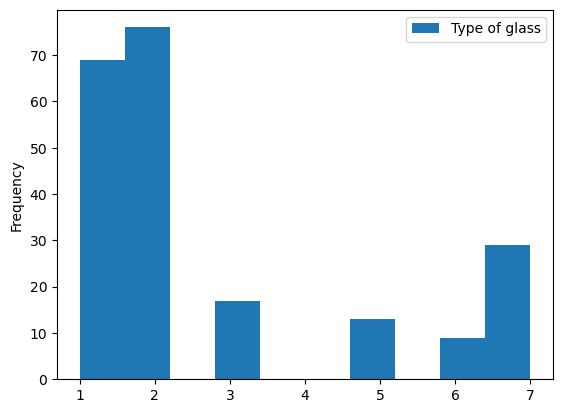

In [5]:
df.plot.hist(x='RI',y='Type of glass')

Most of glass type is 1 and 2.

<AxesSubplot:>

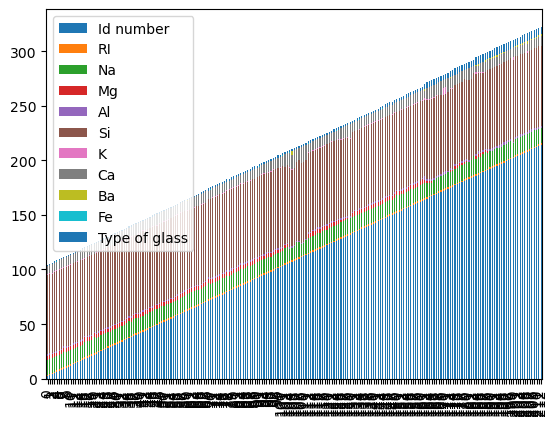

In [6]:
df.plot.bar(stacked=True)

<AxesSubplot:xlabel='Type of glass', ylabel='RI'>

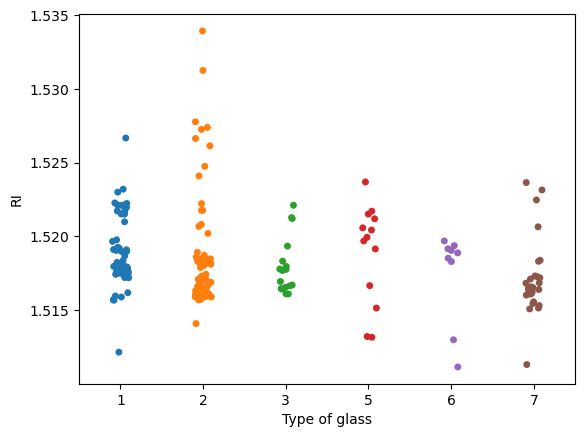

In [7]:
sb.stripplot(x='Type of glass',y='RI',data=df)

RI is between to 1.515 to 1.525 in building_windows_float_processed glass(1), 

RI 1.515 to 1.530 in building_windows_non_float_processed glass(2)

RI is most of around 1.520 in tableware glass(6)


<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

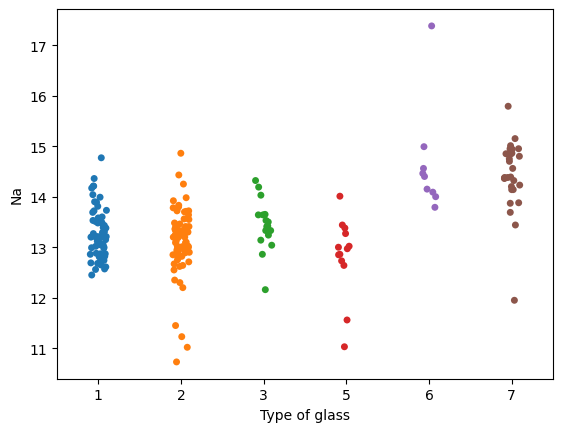

In [8]:
sb.stripplot(x='Type of glass',y='Na',data=df)

Sodium(Na) is higher in tableware glass and headlamps glass type compare to other glass types


<AxesSubplot:xlabel='Type of glass', ylabel='Mg'>

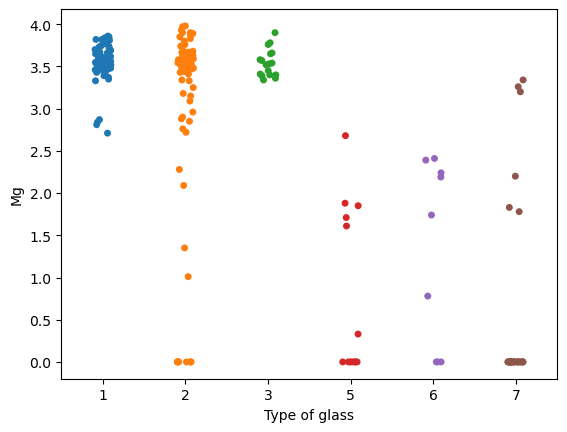

In [9]:
sb.stripplot(x='Type of glass',y='Mg',data=df)

Magnesium is high in building_windows_float_processed glass, building_windows_non_float_processed glass, vehicle_windows_float_processed glass.


<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

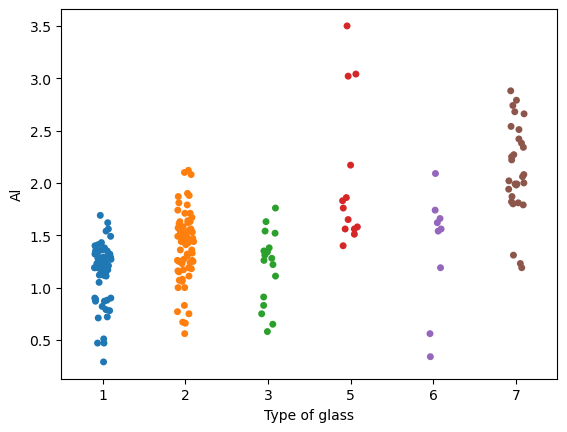

In [10]:
sb.stripplot(x='Type of glass',y='Al',data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

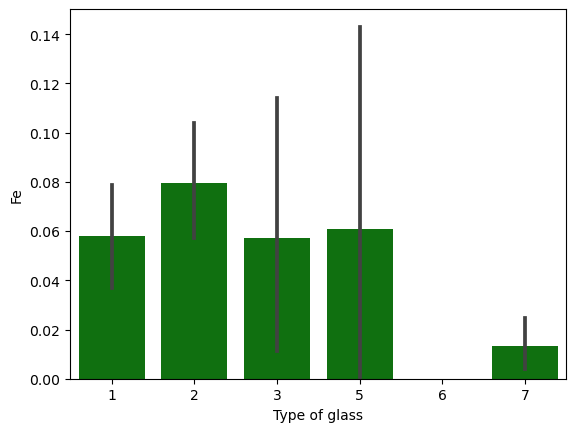

In [11]:

sb.barplot(x='Type of glass', y='Fe', data=df, color='green', label='Fe')

Fe is less in headlamps glass.

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

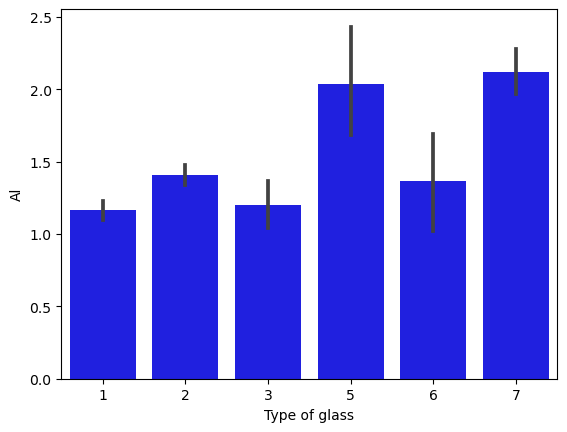

In [12]:

sb.barplot(x='Type of glass', y='Al', data=df, color='blue', label='Al')

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

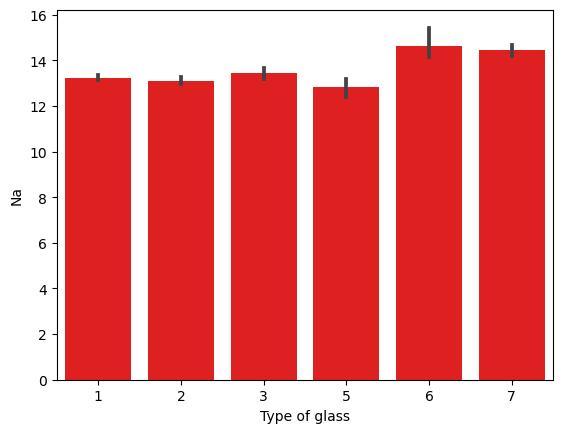

In [13]:
sb.barplot(x='Type of glass', y='Na', data=df, color='Red', label='Na')

<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

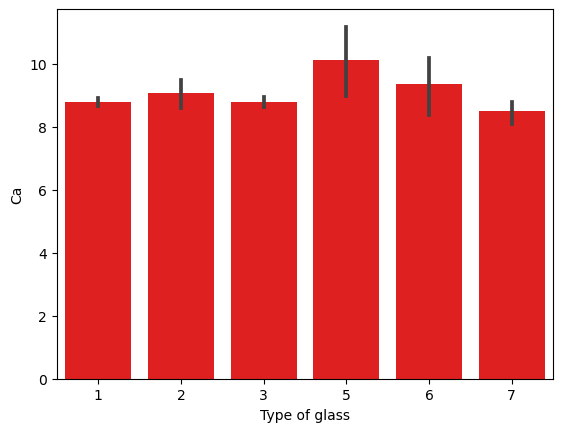

In [14]:
sb.barplot(x='Type of glass', y='Ca', data=df, color='Red', label='Na')

Calcium is highest in containers glass compared to other glass.

<AxesSubplot:>

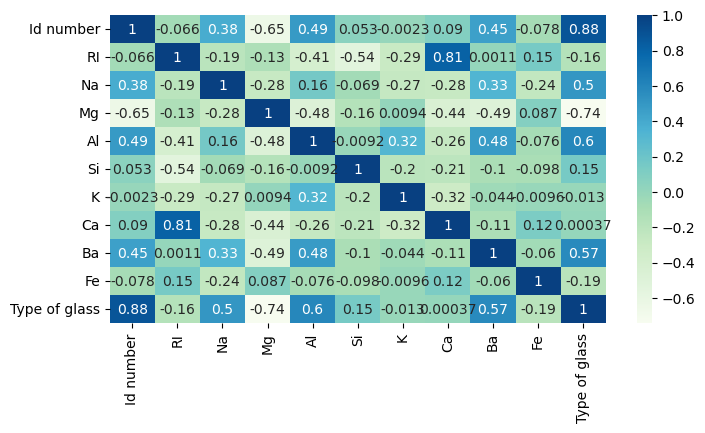

In [15]:
plt.figure(figsize=(8,4))
sb.heatmap(df.corr(),cmap='GnBu',annot=True)

In [16]:
x=df.iloc[:,0:-1]

In [17]:
y=df.iloc[:,-1]

In [18]:
x.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

In [20]:
x.shape

(213, 10)

In [21]:
y.shape

(213,)

In [22]:
!pip install -U scikit-learn

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [26]:
mnb=MultinomialNB()

In [27]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [28]:
predmnb=mnb.predict(x_test)

In [29]:
predmnb

array([1, 7, 2, 7, 2, 2, 1, 2, 2, 3, 7, 5, 3, 2, 6, 5, 7, 1, 1, 3, 2, 7,
       7, 7, 3, 2, 1, 1, 3, 1, 1, 3, 3, 2, 2, 7, 5, 3, 2, 2, 2, 5, 2, 2,
       3, 2, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 7, 2, 3, 2, 1, 3, 1, 7, 5, 3,
       2, 2, 7, 1, 1], dtype=int64)

In [30]:
accuracy_score(y_test,predmnb)

0.7605633802816901

Mutinomial Accuracy score is 76%.  

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=5)


In [33]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
knnpred=knn.predict(x_test)

In [35]:
knnpred


array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 5, 2, 2, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 3, 2, 1, 1, 6, 1, 1, 2, 3, 2, 2, 7, 5, 3, 2, 2, 2, 7, 1, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5, 2,
       1, 2, 6, 1, 1], dtype=int64)

In [36]:
accuracy_score(y_test,knnpred)

0.971830985915493

Knn Accuracy is 97 % in model.

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()

In [39]:
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [40]:
preddtc=dtc.predict(x_test)

In [41]:
preddtc

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 5, 2, 7,
       7, 7, 3, 2, 1, 1, 6, 1, 1, 2, 3, 2, 2, 7, 5, 3, 2, 2, 2, 7, 1, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5, 2,
       1, 2, 6, 1, 1], dtype=int64)

In [42]:
accuracy_score(preddtc,y_test)


0.971830985915493

Decision Tree model Accuracy in 97 %.

In [43]:
import sklearn
from sklearn.svm import SVC

In [44]:
sv=SVC()

In [45]:
sv.fit(x_train,y_train)

SVC()

In [46]:
predsv=sv.predict(x_test)

In [47]:
accuracy_score(y_test,predsv)

0.8450704225352113

SVC accuracy is 84%.

In [48]:
confusion_matrix(y_test,knnpred)

array([[20,  1,  0,  0,  0,  0],
       [ 0, 25,  1,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0, 11]], dtype=int64)

In [49]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.96      0.96      0.96        26
           3       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        11

    accuracy                           0.97        71
   macro avg       0.96      0.99      0.97        71
weighted avg       0.97      0.97      0.97        71



As compared to all model we have highest accuracy in Knn model which is 97 %.

In [65]:
pred=knn.predict(x_test)

In [66]:
print('Predicted score:',pred)
print('actual score',y_test)

Predicted score: [1 7 1 7 2 2 1 2 2 3 6 5 2 2 6 5 7 1 1 7 2 7 7 7 3 2 1 1 6 1 1 2 3 2 2 7 5
 3 2 2 2 7 1 2 3 2 2 2 2 2 1 1 2 2 1 1 7 2 5 1 1 2 1 7 5 2 1 2 6 1 1]
actual score 9      1
197    7
66     1
191    7
117    2
      ..
65     1
108    2
181    6
31     1
12     1
Name: Type of glass, Length: 71, dtype: int64


As we can see our model is prefect we can see comparision of actual glass type and predicted glass type in above.